# San Francisco Reported Crimes: Summer 2014
## Exploratory Data Analysis
#### bdanalytics Jan 22, 2016

### Analysis Summary

The number of reported crimes increased steadily by month driven mostly by increases in larceny/theft. 

Reported Crimes per day was consistent across weekdays and weekends which is surprising given that weekends / holidays are expected to have more reported crimes because more people are not in offices / schools and are more willing (more time flexibility) to report any observed crimes.

Over 400 crimes were reported on Jun 28, Aug 08 & 09 2014 - the top 3 days. These were not holidays & no sporting events were scheduled on these days.  

Greatest reports occur between 5-7pm on average. Second peak occurs during lunch time (12-1 pm). Significantly less crimes are reported between 1-8 am.  

Most crimes are reported to have occured around the hour begin/end or precisely mid-hour. Less crimes are reported to have occured during any other time. Could be related to human recollection (psychological) phenomena ?

### Import Data

In [4]:
glbObsAll <- read.csv("data/sanfrancisco_incidents_summer_2014.csv")
print(sprintf("Imported %d observations with %d features", 
      nrow(glbObsAll), ncol(glbObsAll)))

[1] "Imported 28993 observations with 13 features"


In [5]:
print("Sample observations:")
print(head(glbObsAll))

[1] "Sample observations:"
  IncidntNum      Category                     Descript DayOfWeek       Date
1  140734311         ARSON           ARSON OF A VEHICLE    Sunday 08/31/2014
2  140736317  NON-CRIMINAL                LOST PROPERTY    Sunday 08/31/2014
3  146177923 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO    Sunday 08/31/2014
4  146177531 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO    Sunday 08/31/2014
5  140734220  NON-CRIMINAL               FOUND PROPERTY    Sunday 08/31/2014
6  140734349 DRUG/NARCOTIC      POSSESSION OF MARIJUANA    Sunday 08/31/2014
   Time PdDistrict     Resolution                   Address         X        Y
1 23:50    BAYVIEW           NONE LOOMIS ST / INDUSTRIAL ST -122.4056 37.73832
2 23:45    MISSION           NONE    400 Block of CASTRO ST -122.4350 37.76177
3 23:30   SOUTHERN           NONE  1000 Block of MISSION ST -122.4098 37.78004
4 23:30   RICHMOND           NONE       FULTON ST / 26TH AV -122.4853 37.77252
5 23:23   RICHMOND           NONE  800 

### Inspect, extract & transform features

#### Frequency
Let's add 1 to each observation as .frq to facilitate analysis

In [77]:
glbObsAll$.frq <- 1
print(sum(glbObsAll$.frq)); print(sum(glbObsAll$.frq) == nrow(glbObsAll)) 

[1] 28993
[1] TRUE


#### Category

In [6]:
print(sort(table(glbObsAll$Category, useNA = "ifany")))


                    BRIBERY                    GAMBLING 
                          1                           1 
    PORNOGRAPHY/OBSCENE MAT                   LOITERING 
                          1                           3 
                   BURGLARY                   EXTORTION 
                          6                           7 
            STOLEN PROPERTY                EMBEZZLEMENT 
                          8                          10 
            FAMILY OFFENSES                     SUICIDE 
                         10                          14 
                  VANDALISM      FORGERY/COUNTERFEITING 
                         17                          18 
         DISORDERLY CONDUCT                 LIQUOR LAWS 
                         31                          42 
                    RUNAWAY                       ARSON 
                         61                          63 
DRIVING UNDER THE INFLUENCE                PROSTITUTION 
                        100   

Let's group these categories to facilitate analysis

In [87]:
glbObsAll$Category.grp.fctr <- 
    factor(plyr::revalue(glbObsAll$Category, c(
        "EMBEZZLEMENT"           = "larceny/theft",        
        "EXTORTION"              = "larceny/theft",        
        "FORGERY/COUNTERFEITING" = "larceny/theft",        
        "FRAUD"                  = "larceny/theft",        
        "LARCENY/THEFT"          = "larceny/theft",
        
        "BURGLARY"        = "burglary/robbery",
        "ROBBERY"         = "burglary/robbery",        
        "STOLEN PROPERTY" = "burglary/robbery", 
        "TRESPASS"        = "burglary/robbery", 
        
        # Less than 10 obs
        "BRIBERY"                 = "other",
        "GAMBLING"                = "other",
        "LOITERING"               = "other",
        "PORNOGRAPHY/OBSCENE MAT" = "other",
        
        # Less than 20 obs
        "FAMILY OFFENSES"        = "other",
        "SUICIDE"                = "other",
        "VANDALISM"              = "other",
        
        # Less than 100 obs        
        "DISORDERLY CONDUCT" = "other",
        "LIQUOR LAWS"        = "other",
        "RUNAWAY"            = "other",
        "ARSON"              = "other",
        
        # Less than 200 obs        
        "DRIVING UNDER THE INFLUENCE" = "other",
        "PROSTITUTION"                = "other",
        "KIDNAPPING"                  = "other",
        "DRUNKENNESS"                 = "other",
        
        # Misc.
        "NON-CRIMINAL"    = "other",
        "SECONDARY CODES" = "other",
        "OTHER OFFENSES"  = "other" ))
        
    ,levels = c("larceny/theft","ASSAULT","VEHICLE THEFT",
                "WARRANTS","DRUG/NARCOTIC","SUSPICIOUS OCC",
                "MISSING PERSON","burglary/robbery","WEAPON LAWS",
                        "other")
          )

print(sort(table(glbObsAll$Category.grp.fctr, useNA = "ifany")))


     WEAPON LAWS burglary/robbery   MISSING PERSON   SUSPICIOUS OCC 
             354              603             1266             1300 
   DRUG/NARCOTIC         WARRANTS    VEHICLE THEFT          ASSAULT 
            1345             1782             1966             2882 
           other    larceny/theft 
            7752             9743 


ERROR: Error in file(con, "rb"): cannot open the connection


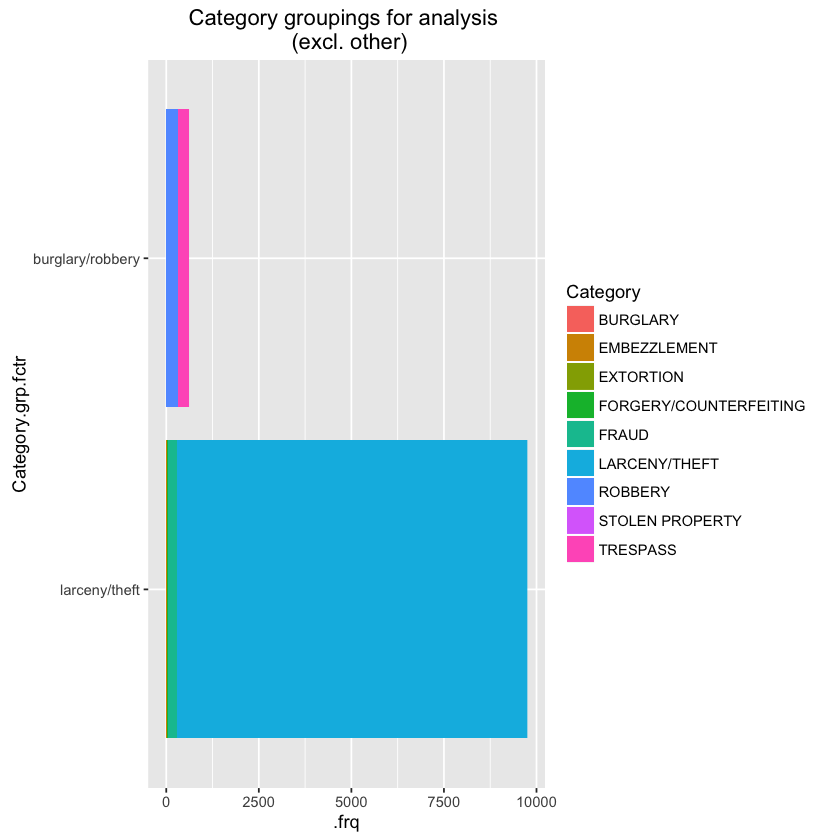

In [99]:
pltLvl <- glbObsAll %>%
    dplyr::group_by(Category.grp.fctr, Category, Resolution) %>%
    dplyr::summarize(.frq = sum(.frq))
#print(pltLvl)
print(ggplot(subset(pltLvl, (Category.grp.fctr %in% 
                             c("burglary/robbery", "larceny/theft"))), 
                    aes(x = Category.grp.fctr, y = .frq)) + 
     geom_bar(aes(fill = Category), stat = "identity") + 
     scale_color_brewer(palette = "Paired") + 
     coord_flip() +  
     ggtitle("Category groupings for analysis \n (excl. other)"))

ERROR: Error in file(con, "rb"): cannot open the connection


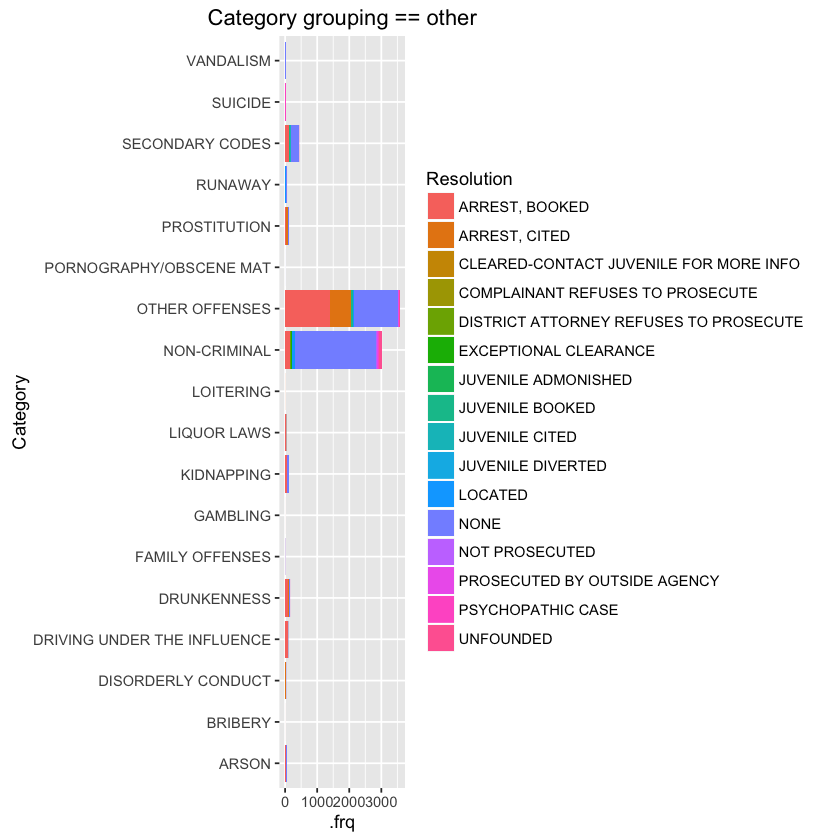

In [100]:
print(ggplot(subset(pltLvl, (Category.grp.fctr %in% c("other"))), 
                    aes(x = Category, y = .frq)) + 
     geom_bar(aes(fill = Resolution), stat = "identity") + 
     scale_color_brewer(palette = "Paired") + 
     coord_flip() +  
     ggtitle("Category grouping == other"))

#### Date & Time

In [101]:
glbObsAll$DT.posix <- as.POSIXct(
    strptime(paste(glbObsAll$Date, glbObsAll$Time, sep = " "), 
                    format = "%m/%d/%Y %H:%M", tz = "US/Pacific"))
print(head(glbObsAll[, c("Date", "Time", "DT.posix")]))

        Date  Time            DT.posix
1 08/31/2014 23:50 2014-08-31 23:50:00
2 08/31/2014 23:45 2014-08-31 23:45:00
3 08/31/2014 23:30 2014-08-31 23:30:00
4 08/31/2014 23:30 2014-08-31 23:30:00
5 08/31/2014 23:23 2014-08-31 23:23:00
6 08/31/2014 23:13 2014-08-31 23:13:00


In [130]:
glbObsAll$DT.month <- as.numeric(format(glbObsAll$DT.posix, "%m"))
glbObsAll$DT.wkend <- 
    as.numeric(format(glbObsAll$DT.posix, "%w")) %in% c(0, 6)
glbObsAll$DT.juliandate <- as.numeric(format(glbObsAll$DT.posix, "%j"))
glbObsAll$DT.hour <- as.numeric(format(glbObsAll$DT.posix, "%H"))
glbObsAll$DT.minute <- as.numeric(format(glbObsAll$DT.posix, "%M"))
glbObsAll$DT.day.mnt <- glbObsAll$DT.hour * 60 + glbObsAll$DT.minute

print(glbObsAll[sample(1:nrow(glbObsAll), 5), 
                grep("DT\\.", names(glbObsAll), value = TRUE)])
ObsWkend <- subset(glbObsAll, DT.wkend)
print(ObsWkend[sample(1:nrow(ObsWkend), 5), 
                grep("DT\\.", names(glbObsAll), value = TRUE)])

                 DT.posix DT.month DT.wkend DT.juliandate DT.hour DT.minute
10867 2014-07-29 21:20:00        7    FALSE           210      21        20
19854 2014-07-01 02:20:00        7    FALSE           182       2        20
21302 2014-06-27 01:30:00        6    FALSE           178       1        30
22350 2014-06-23 14:32:00        6    FALSE           174      14        32
16814 2014-07-11 05:30:00        7    FALSE           192       5        30
      DT.day.mnt
10867       1280
19854        140
21302         90
22350        872
16814        330
                 DT.posix DT.month DT.wkend DT.juliandate DT.hour DT.minute
14162 2014-07-19 19:45:00        7     TRUE           200      19        45
24719 2014-06-15 15:00:00        6     TRUE           166      15         0
18261 2014-07-06 12:00:00        7     TRUE           187      12         0
16273 2014-07-12 22:00:00        7     TRUE           193      22         0
20706 2014-06-28 18:45:00        6     TRUE           179     

### Analysis by month

In [103]:
require(dplyr)
require(tidyr)
require(ggplot2)
require(RColorBrewer)

ERROR: Error in file(con, "rb"): cannot open the connection


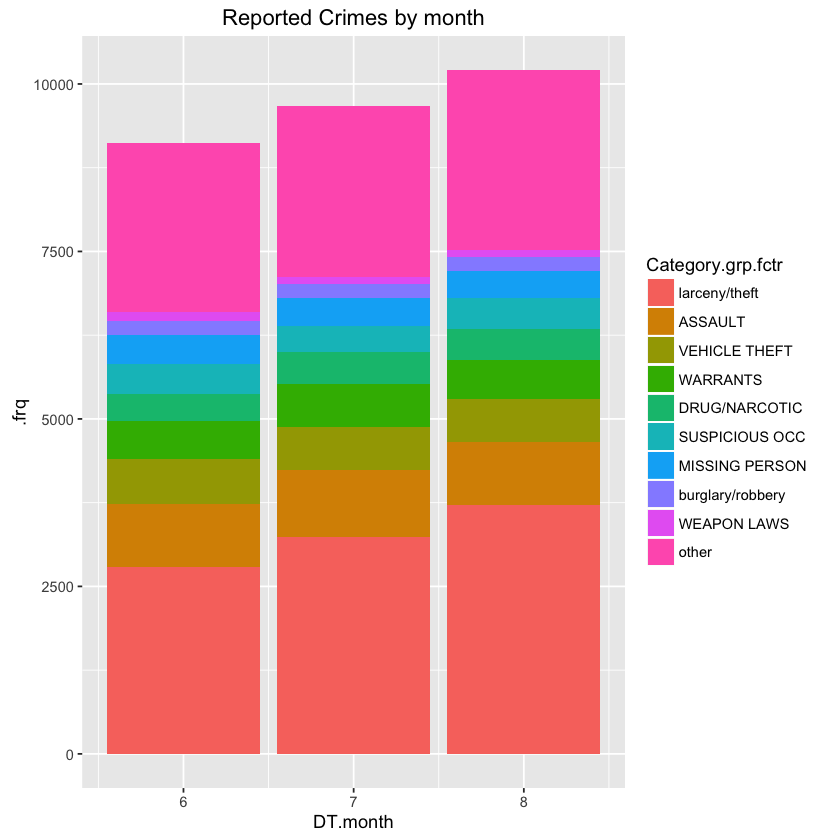

In [104]:
pltLvl <- dplyr::select(glbObsAll, -DT.posix) %>%
    dplyr::group_by(Category.grp.fctr, DT.month) %>%
    dplyr::summarize(.frq = sum(.frq)) 
print(gp <- ggplot(pltLvl, aes(x = DT.month, y = .frq)) + 
    geom_bar(aes(fill = Category.grp.fctr), stat = "identity") +
    scale_color_brewer(palette = "Paired") + 
    ggtitle("Reported Crimes by month"))

The number of reported crimes is increasing steadily by month driven mostly by increases in larceny/theft. Let's investigate if there is any variation by weekdays / weekends. Weekends are expected to have more reported crimes because more people are not in offices / schools and are more willing to report any observed crimes.

Joining by: c("DT.month", "DT.wkend")


ERROR: Error in file(con, "rb"): cannot open the connection


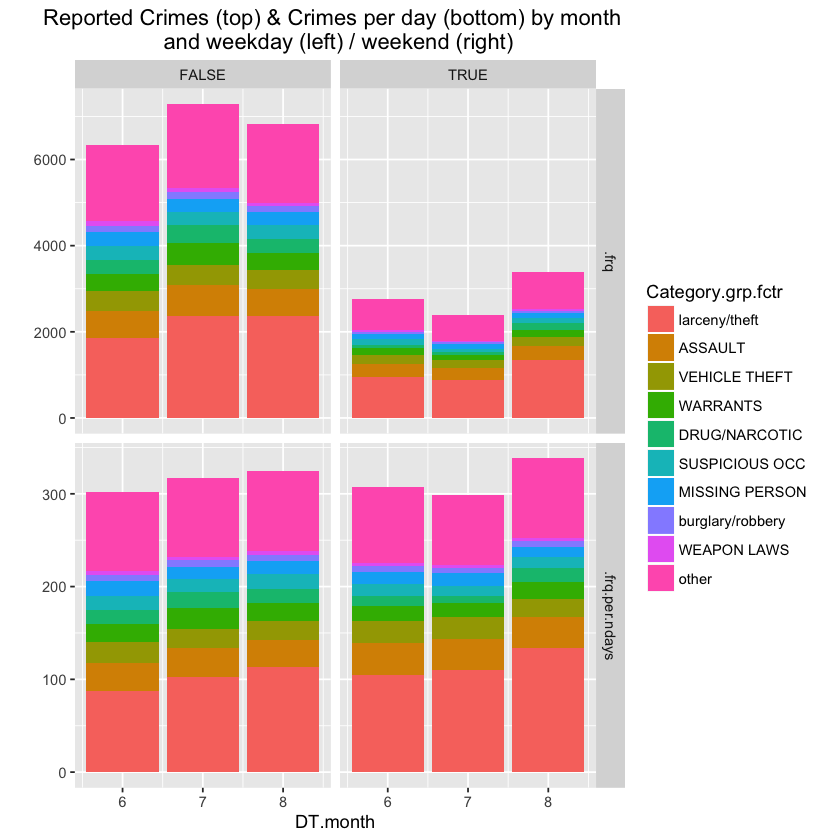

In [105]:
pltNDays <- dplyr::select(glbObsAll, -DT.posix) %>%
    dplyr::group_by(DT.month, DT.wkend) %>%
    dplyr::summarize(.ndays = length(unique(DT.juliandate)))
#print(head(pltNDays))
pltLvl <- dplyr::select(glbObsAll, -DT.posix) %>%
    dplyr::group_by(Category.grp.fctr, DT.month, DT.wkend) %>%
    dplyr::summarize(.frq = sum(.frq)) %>%
    dplyr::left_join(pltNDays) %>%
    dplyr::mutate(.frq.per.ndays = .frq * 1.0 / .ndays)
#print(head(pltLvl))
pltLvlMltpY <- pltLvl %>%
    dplyr::select(-.ndays) %>%
    tidyr::gather(key = variable, value = value, 
                  -DT.month, -DT.wkend, -Category.grp.fctr)
#print(head(pltLvlMltpY))
print(gp <- ggplot(pltLvlMltpY, aes(x = DT.month, y = value)) + 
    geom_bar(aes(fill = Category.grp.fctr), stat = "identity") +
    scale_color_brewer(palette = "Paired") + 
    facet_grid(variable ~ DT.wkend, scales = "free_y") + 
    ylab(" ") + 
    ggtitle("Reported Crimes (top) & Crimes per day (bottom) by month \n and weekday (left) / weekend (right)")
    )

It appears that frequency of reported crimes is consistent across weekdays & weekends.

#### Analysis by day

ERROR: Error in file(con, "rb"): cannot open the connection


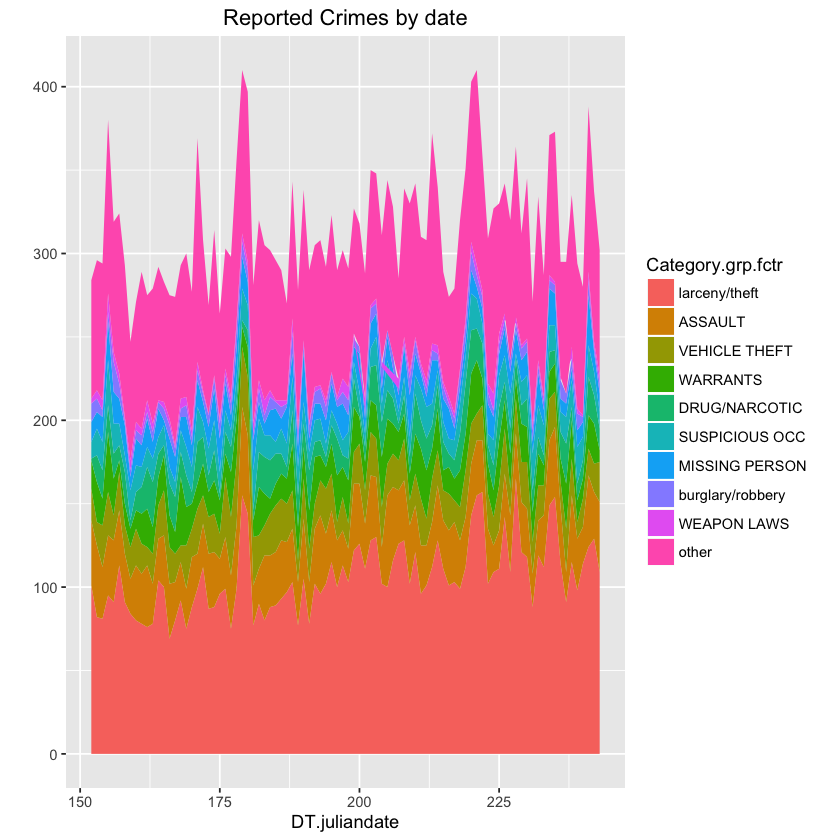

In [106]:
pltLvl <- dplyr::select(glbObsAll, -DT.posix) %>%
    dplyr::group_by(Category.grp.fctr, DT.juliandate, DT.wkend) %>%
    dplyr::summarize(.frq = sum(.frq))
print(gp <- ggplot(pltLvl, aes(x = DT.juliandate, y = .frq)) + 
    geom_area(aes(fill = Category.grp.fctr)) + 
    ylim(c(0, NA)) + ylab(" ") + 
    ggtitle("Reported Crimes by date")          
    )

This displays a couple of peaks, so let's investigate the top 10 crime dates.

In [176]:
# print(dplyr::arrange(pltDatesTopN, desc(.frq)))
#print(unlist(dplyr::arrange(pltDatesTopN, desc(.frq))[1:3, "DT.juliandate"]))
# print(glbObsAll[glbObsAll$DT.juliandate %in% 
#             unlist(dplyr::arrange(pltDatesTopN, desc(.frq))[1:3, "DT.juliandate"]),
#                        c("Date", "DT.juliandate")])
# print(unique(glbObsAll[glbObsAll$DT.juliandate %in% 
#             unlist(dplyr::arrange(pltDatesTopN, desc(.frq))[1:3, "DT.juliandate"]),
#                        "Date"]))

ERROR: Error in file(con, "rb"): cannot open the connection


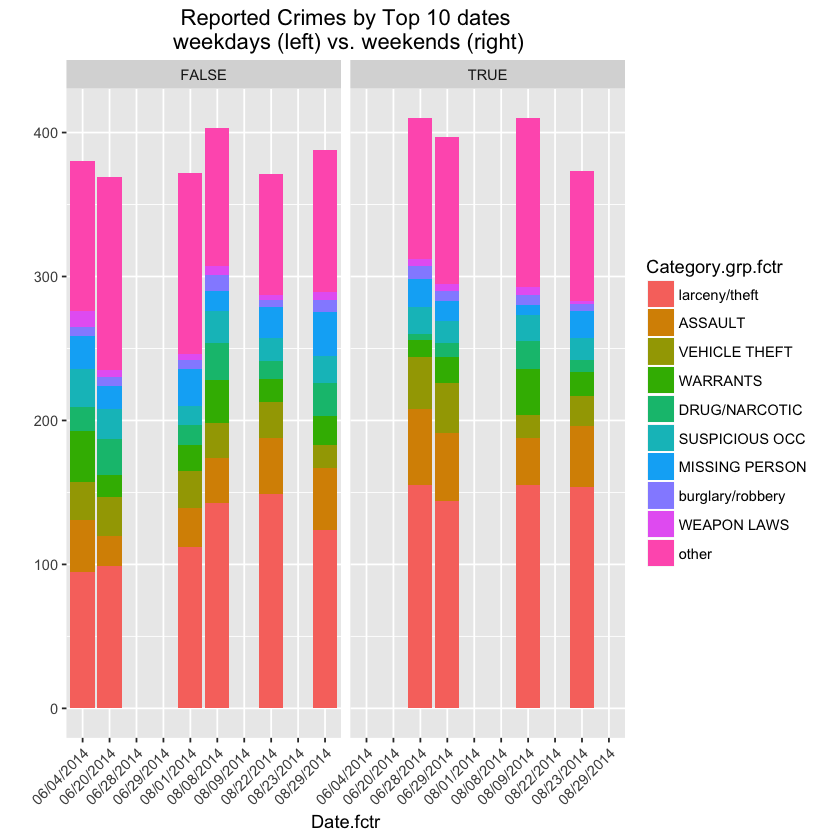

In [107]:
pltDatesTopN <- glbObsAll %>%
    dplyr::group_by(DT.juliandate) %>%
    dplyr::summarize(.frq = sum(.frq)) %>%
    dplyr::top_n(10, .frq)
#print(pltDatesTopN)

pltLvl <- glbObsAll %>%
    dplyr::filter(DT.juliandate %in% pltDatesTopN$DT.juliandate) %>%
    dplyr::group_by(Category.grp.fctr, Date, DT.wkend) %>%
    dplyr::summarize(.frq = sum(.frq)) %>%
    dplyr::mutate(Date.fctr = as.factor(Date))
#print(head(pltLvl))

print(gp <- ggplot(pltLvl, aes(x = Date.fctr, y = .frq)) + 
    geom_bar(aes(fill = Category.grp.fctr), stat = "identity") +
    facet_wrap(~DT.wkend) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    ylab(" ") + 
    ggtitle("Reported Crimes by Top 10 dates\n weekdays (left) vs. weekends (right)")          
    )

Not holidays. What else might be driving crimes on these dates ? Sports events on these dates ?

#### Analysis by hour of day

ERROR: Error in file(con, "rb"): cannot open the connection


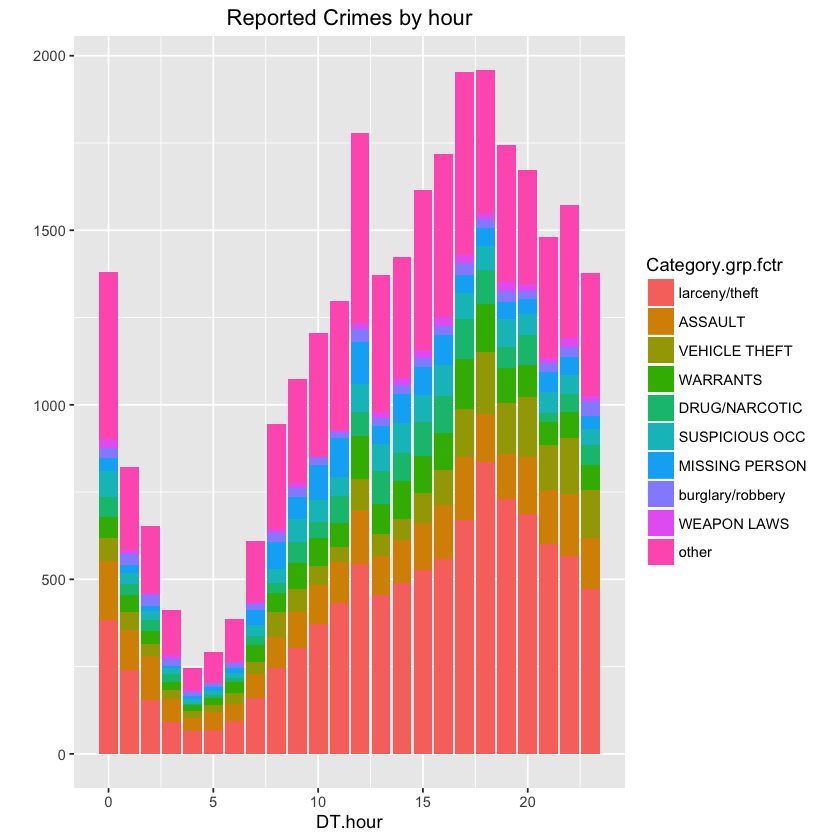

In [121]:
pltLvl <- glbObsAll %>%
    dplyr::group_by(Category.grp.fctr, DT.month, DT.hour, DT.wkend) %>%
    dplyr::summarize(.frq = sum(.frq)) 
print(gp <- ggplot(pltLvl, aes(x = DT.hour, y = .frq)) + 
        geom_bar(aes(fill = Category.grp.fctr), stat = "identity") +
        scale_color_brewer(palette = "Paired") + 
        ylab(" ") + 
        ggtitle("Reported Crimes by hour")
    )

Less crimes are reported between 1-8 am. Highest reports occur between 5-7pm. Second peak during lunch time (12-1 pm).  

#### Analysis by minute

ERROR: Error in file(con, "rb"): cannot open the connection


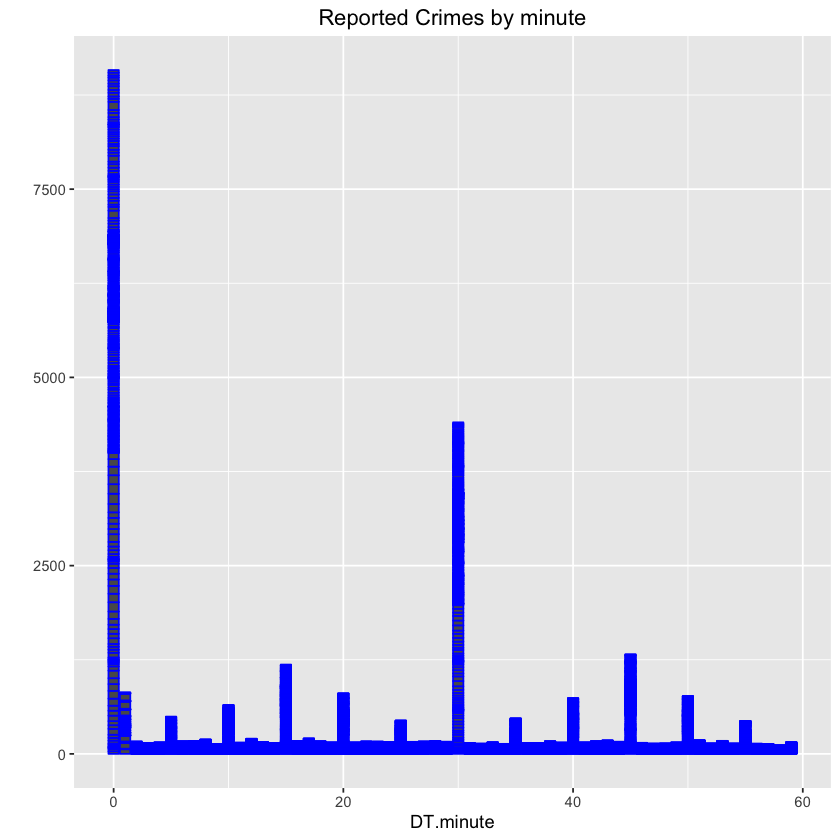

In [134]:
pltLvl <- glbObsAll %>%
    dplyr::group_by(Category.grp.fctr, DT.month, DT.hour, DT.minute) %>%
    dplyr::summarize(.frq = sum(.frq)) 
print(gp <- ggplot(pltLvl, aes(x = DT.minute, y = .frq)) + 
        geom_bar(aes(), color = "blue", stat = "identity") +
        ylab(" ") + 
        ggtitle("Reported Crimes by minute")
    )

It appears that most crimes are reported to have occured around the 0 & 30 minutes mark. Is that happening every hour or less frequently every day ?

ERROR: Error in file(con, "rb"): cannot open the connection


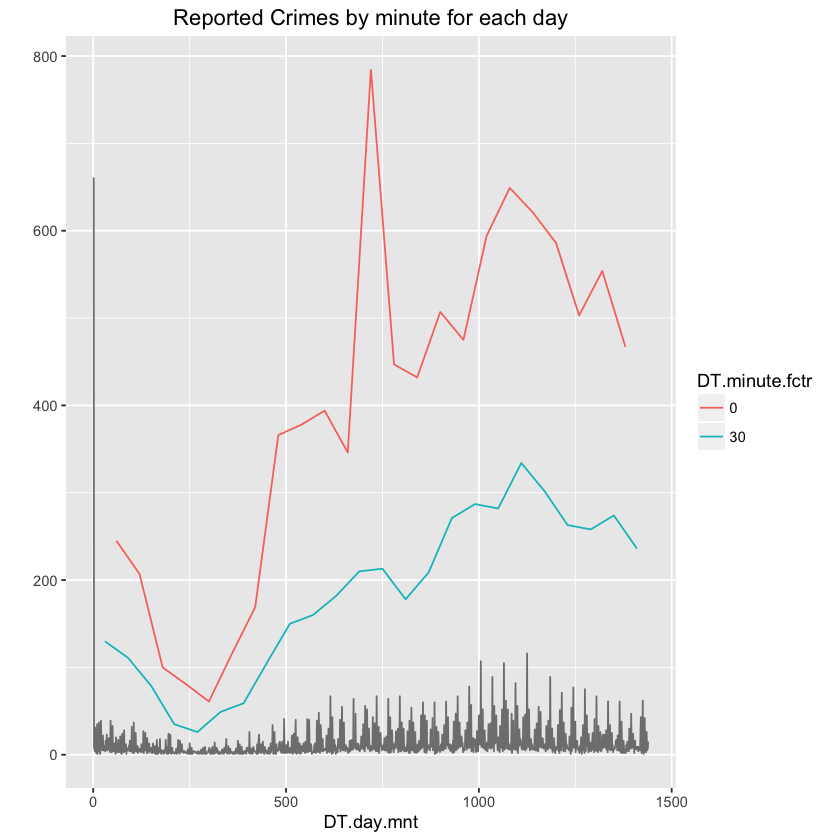

In [158]:
pltLvl <- glbObsAll %>%
    dplyr::group_by(DT.day.mnt, DT.minute) %>%
    dplyr::summarize(.frq = sum(.frq)) %>%
    dplyr::mutate(DT.minute.fctr = factor(DT.minute, levels = c(0, 30)))
# print(head(dplyr::ungroup(pltLvl) %>% dplyr::arrange(desc(.frq))))
# print(head(dplyr::ungroup(pltLvl) %>% dplyr::filter(DT.minute > 0) %>% dplyr::arrange(desc(.frq))))
print(gp <- ggplot(pltLvl, aes(x = DT.day.mnt, y = .frq)) + 
        geom_line(aes(color = DT.minute.fctr)) + 
        ylab(" ") + 
        ggtitle("Reported Crimes by minute for each day")
    )

This phenomena is occuring throughout the day. People / Witnesses estimate hour begin/end & mid-hour for events more frequently ?

In [1]:
sessionInfo()

R version 3.2.2 (2015-08-14)
Platform: x86_64-apple-darwin15.0.0 (64-bit)
Running under: OS X 10.11.2 (El Capitan)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.3        magrittr_1.5       splines_3.2.2      MASS_7.3-45       
 [5] uuid_0.1-2         munsell_0.4.2      colorspace_1.2-6   lattice_0.20-33   
 [9] foreach_1.4.3      minqa_1.2.4        stringr_1.0.0      car_2.1-1         
[13] plyr_1.8.3         tools_3.2.2        nnet_7.3-11        pbkrtest_0.4-4    
[17] parallel_3.2.2     caret_6.0-64       grid_3.2.2         gtable_0.1.2      
[21] nlme_3.1-123       mgcv_1.8-10        quantreg_5.19      MatrixModels_0.4-1
[25] iterators_1.0.8    digest_0.6.9       lme4_1.1-10        Matrix_1.2-3      
[29] IRdisplay_0.3      repr_0.4           nloptr_1.0.4       reshape2_1.4.1    
[33] ggplot2_2.0.0 